# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Módulo I - Dados Estruturados, Não Estruturados e problemas típicos em bases de dados</span>


## <span style="color:darkred">Avaliação com soluções</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos


---

In [1]:
# carregando a biblioteca necessária
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Considere a base de dados disponível em `TACTD-01-Base.csv`. Essa base contém dados de profissionais da área da saúde incluindo: nome, sexo, ano de nascimento, religião, país e cidade de residência, número de anos de experiência (reportado pelo profissional), salário e ano do primeiro emprego (esse último é obtido subtraindo o ano de 2022 pelos anos de experiência). A cada questão, recarregue os dados para que ações realizadas numa questão não influencie nas outras.

### Questão 1)

Considere a base de dados disponível em `TACTD-01-Base.csv`. Analise o atributo 'Sex' buscando por dados incorretos, considerando que são corretos apenas 'F' e 'M' (em letras maiúsculas). Corrija os que forem possível corrigir. Após o tratamento, com relação aos dados faltantes no atributo 'Sex', i.e. linhas que não sejam 'F' nem 'M', podemos dizer que:
 
 (a) São do tipo completamente aleatório (MCAR)<br>
 (b) São do tipo (condicionalmente) aleatório (MAR)<br>
 (c) São do tipo não aleatório<br>
 (d) Não há dados faltantes<br>

In [34]:
df = pd.read_csv("./dados/TACTD-01-Base.csv")

print('Nr de observações do Dataframe: ', df.shape[0])
df.head(3)

Nr de observações do Dataframe:  105


,Name,Sex,Year of Birth,Country of Residency,Religion,City,Profession,Years of Experience,Salary,Year first employment
0,Albert Keller,M,1979,USA,Buddhist,New Orleans,Nurse,15.0,58905.7,2006.0
1,Alexandre Ronaldo,NaN,1980,United Arab Emirates,Christian,Dubai,Nurse,13.0,32000.5,2008.0
2,Alton Thornton,M,1984,Canada,----,Vancouver,Nurse,3.0,50940.0,2018.0


In [35]:
# identificando os tipos de observações no atributo Sex
df['Sex'].unique()

array(['M', nan, 'F', 'm', '---', 'f'], dtype=object)

In [36]:
#corrigindo os valores m e f para M e F, respectivamente
df.loc[df['Sex'] == 'm', 'Sex'] = 'M'
df.loc[df['Sex'] == 'f', 'Sex'] = 'F'

df['Sex'].unique()

array(['M', nan, 'F', '---'], dtype=object)

In [37]:
# Nr de dados faltantes, após correção de m e f em Sex
count_number = df['Sex'].describe()[0]
count_nan = (count_number - df.shape[0]) *-1

print('Numero de observações faltante: ',count_nan)
df[df['Sex'].isnull()]


Numero de observações faltante:  6


,Name,Sex,Year of Birth,Country of Residency,Religion,City,Profession,Years of Experience,Salary,Year first employment
1,Alexandre Ronaldo,NaN,1980,United Arab Emirates,Christian,Dubai,Nurse,13.0,32000.5,2008.0
10,Ariel Almada,NaN,1950,Portugal,Christian,Lisbon,Nurse,45.0,47150.7,1976.0
25,Elias Elmo,NaN,1970,Portugal,Christian,Lisbon,Nurse,20.0,48244.9,2001.0
26,Elisa Cain,NaN,1984,Portugal,Christian,Lisbon,Nurse,5.0,48708.4,2016.0
71,Miriam Riley,NaN,1970,Portugal,Christian,Lisbon,Nurse,16.0,53965.6,2005.0
80,Ramon West,NaN,1984,Portugal,Christian,Lisbon,Nurse,NaN,47240.7,NaN


In [41]:
#observações em Sex que não são F ou M
df['Sex'].value_counts()

F      52
M      46
---     1
Name: Sex, dtype: int64

In [43]:
df[df['Sex'] == '---']

,Name,Sex,Year of Birth,Country of Residency,Religion,City,Profession,Years of Experience,Salary,Year first employment
34,Gabriel Paiva,---,1981,Portugal,Christian,Lisbon,Nurse,3.0,47973.3,2018.0


In [42]:
#nr de dados faltantes + dados errados
count_faltante = count_nan + df['Sex'].value_counts()[2]

print('Nr de dados faltantes + erro: ',count_faltante)

Nr de dados faltantes + erro:  7


In [51]:
print('RESPOSTA = Com base na análise visual fica claro que é um caso de MAR, com relação a variável de geolocalização')

RESPOSTA = Com base na análise visual fica claro que é um caso de MAR, com relação a variável de geolocalização


---

### Questão 2)

Considere a base de dados disponível em `TACTD-01-Base.csv`, e analise os dados no atributo 'Religion' por dados incorretos. Marque como nulos/nans os incorretos não passíveis de correção. Esse atributo possui os seguintes problemas:

 (a) 9 dados faltantes, sendo desses 5 inicialmente errôneos, nenhum corrigido<br>
 (b) 4 dados faltantes, sendo desses 4 inicialmente errôneos, 5 dados corrigidos<br>
 (c) 4 dados faltantes, sendo desses 2 inicialmente errôneos, 2 dados corrigidos<br>
 (d) 9 dados faltantes, sendo desses 4 inicialmente errôneos, 5 dados corrigidos<br>


In [52]:
df = pd.read_csv("./dados/TACTD-01-Base.csv")
df.head(3)

,Name,Sex,Year of Birth,Country of Residency,Religion,City,Profession,Years of Experience,Salary,Year first employment
0,Albert Keller,M,1979,USA,Buddhist,New Orleans,Nurse,15.0,58905.7,2006.0
1,Alexandre Ronaldo,NaN,1980,United Arab Emirates,Christian,Dubai,Nurse,13.0,32000.5,2008.0
2,Alton Thornton,M,1984,Canada,----,Vancouver,Nurse,3.0,50940.0,2018.0


In [54]:
## valores no atributo religion
df['Religion'].unique()

array(['Buddhist', 'Christian', '----', nan, 'Jew', 'd', '[', '1', 'Ac%#'],
      dtype=object)

In [61]:
## contagem dos valores
df['Religion'].value_counts()

Christian    87
Buddhist      5
Jew           4
----          1
d             1
[             1
1             1
Ac%#          1
Name: Religion, dtype: int64

In [68]:
# nr de dados faltantes null / nan
print('Numero de dados Null/Nan em Religion: ',df[df['Religion'].isnull()].count()[0])



Numero de dados Null/Nan em Religion:  4


In [56]:
df[df['Religion'] == '----']

,Name,Sex,Year of Birth,Country of Residency,Religion,City,Profession,Years of Experience,Salary,Year first employment
2,Alton Thornton,M,1984,Canada,----,Vancouver,Nurse,3.0,50940.0,2018.0


In [57]:
df[df['Religion'] == 'd']

,Name,Sex,Year of Birth,Country of Residency,Religion,City,Profession,Years of Experience,Salary,Year first employment
53,Leanne Lowy,F,1969,England,d,Birmingham,Nurse,22.0,52494.9,1999.0


In [58]:
df[df['Religion'] == '[']

,Name,Sex,Year of Birth,Country of Residency,Religion,City,Profession,Years of Experience,Salary,Year first employment
66,Marlon Moore,M,1984,Australia,[,Brisbane,Nurse,4.0,59091.8,2017.0


In [59]:
df[df['Religion'] == '1']

,Name,Sex,Year of Birth,Country of Residency,Religion,City,Profession,Years of Experience,Salary,Year first employment
67,Marshall Vargas,M,1990,Scotland,1,Edinburgh,Nurse,NaN,53696.1,NaN


In [60]:
df[df['Religion'] == 'Ac%#']

,Name,Sex,Year of Birth,Country of Residency,Religion,City,Profession,Years of Experience,Salary,Year first employment
100,Zachary Yates,M,2010,England,Ac%#,_Dh,Nurse,3.0,47817.8,2018.0


In [70]:
print('RESPOSTA = 9 dados faltantes, sendo 5 errôneos e nenhum corrigido no atributo Religion')

RESPOSTA = 9 dados faltantes, sendo 5 errôneos e nenhum corrigido no atributo Religion


---
### Questão 3)

Dados estruturados, quando comparados aos não-estruturados, são caracterizados por:

(a) permitir executar validação dos dados, mas não possibilitar acesso direto<br>
(b) possibilitar maior liberdade/flexibilidade na coleta dos dados, sendo ideais para coleta com baixo controle<br>
(c) armazenado em arquivos de formato texto livre, permitindo controle de versões<br>
(d) possuir campos e atributos que permitam endereçar diretamente os dados <br>

---

### Questão 4)

Considere a base de dados disponível em `TACTD-01-Base.csv`, e analise os dados no atributo Salary por meio do gráfico de caixa e depois visualizando as linhas contendo outliers mostrados no gráfico de caixa. 

O atributo possui:

(a) 2 outliers globais<br>
(b) 4 outliers globais<br>
(c) 5 outliers globais<br>
(d) 6 outliers globais<br>

In [72]:
df = pd.read_csv("./dados/TACTD-01-Base.csv")

df.head(3)

,Name,Sex,Year of Birth,Country of Residency,Religion,City,Profession,Years of Experience,Salary,Year first employment
0,Albert Keller,M,1979,USA,Buddhist,New Orleans,Nurse,15.0,58905.7,2006.0
1,Alexandre Ronaldo,NaN,1980,United Arab Emirates,Christian,Dubai,Nurse,13.0,32000.5,2008.0
2,Alton Thornton,M,1984,Canada,----,Vancouver,Nurse,3.0,50940.0,2018.0


<AxesSubplot:>

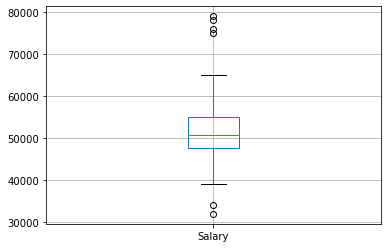

In [73]:
df.boxplot(column=['Salary'])

In [78]:
df['Salary'].describe()

count      105.000000
mean     51778.169524
std       7313.101178
min      32000.500000
25%      47699.400000
50%      50703.700000
75%      55002.700000
max      79000.000000
Name: Salary, dtype: float64

In [93]:
q1 = df['Salary'].describe()[4]
q3 = df['Salary'].describe()[6]

iqr = round(q3-q1,0)

out_inferior = round(q1 - 1.5*IQR,0)
out_superior = round(q3 + 1.5*IQR,0)

print('Quartil 25% q1 = ', q1, '| Quartil 75% q3 = ', q3)
print('IQR é = ', iqr)
print('Outlier Inferior = ', out_inferior, '| Outlier Superior = ', out_superior)

Quartil 25% q1 =  47699.4 | Quartil 75% q3 =  55002.7
IQR é =  7303.0
Outlier Inferior =  36744.0 | Outlier Superior =  65958.0


In [95]:
print('Nr de outliers globais = ', df[(df['Salary'] < out_inferior) | (df['Salary'] > out_superior)].count()[0])
df[(df['Salary'] < out_inferior) | (df['Salary'] > out_superior)]

Nr de outliers globais =  6


,Name,Sex,Year of Birth,Country of Residency,Religion,City,Profession,Years of Experience,Salary,Year first employment
1,Alexandre Ronaldo,NaN,1980,United Arab Emirates,Christian,Dubai,Nurse,13.0,32000.5,2008.0
7,Apolonia Abler,F,1967,Canada,Christian,Vancouver,Nurse,18.0,34100.0,2003.0
101,Virgil Freeman,M,1984,United Arab Emirates,Christian,Dubai,Nurse,25.0,78000.0,1996.0
102,Michele London,F,1980,United Arab Emirates,Buddhist,Dubai,Nurse,18.0,76000.0,2003.0
103,Ricardo Alvarez,M,1990,United Arab Emirates,Christian,Dubai,Nurse,8.0,75000.0,2013.0
104,Raelynn Murphy,F,1979,United Arab Emirates,Jew,Dubai,Nurse,32.0,79000.0,1989.0


## Questão 5)

Considere a base de dados disponível em `TACTD-01-Base.csv`, e busque por linhas duplicadas e atributos não informativos (redundantes/constantes). Quantas linhas duplicadas foram encontradas, e qual(is) atributo(s) pode(m) ser considerado(s) não informativo(s)?

(a) 1 linha duplicada; atributos não informativos: Profession<br>
(b) 1 linha duplicada; atributos não informativos: Profession e Year first employment<br>
(c) 1 linha duplicada; atributos não informativos: Year first employment<br>
(d) 2 linhas duplicadas; atributos não informativos: Profession e Year first employment<br>

In [97]:
df = pd.read_csv("./dados/TACTD-01-Base.csv")

In [115]:
df.shape

(105, 10)

In [100]:
# Encontrando redundância, ou seja, observações duplicadas

df[df.duplicated()]

,Name,Sex,Year of Birth,Country of Residency,Religion,City,Profession,Years of Experience,Salary,Year first employment
84,Ruby Singleton,F,1982,USA,Christian,New Orleans,Nurse,7.0,41000.0,2014.0


In [101]:
print('RESPOSTA = Apresentamos 1 linha duplicada conforme mostrado acima')

RESPOSTA = Apresentamos 1 linha duplicada conforme mostrado acima


In [104]:
# encontrando atributos não informativos

print('Valores únicos = ', df['Sex'].unique(), '\n')
df['Sex'].value_counts()

Valores únicos =  ['M' nan 'F' 'm' '---' 'f'] 



F      51
M      44
m       2
---     1
f       1
Name: Sex, dtype: int64

In [105]:
print('Valores únicos = ', df['Year of Birth'].unique(), '\n')
df['Year of Birth'].value_counts()

Valores únicos =  [1979 1980 1984 1977 1981 1967 1976 1950 1968 1989 1985 1983 1987 1958
 1962 1965 1970 1978 1969 1988 1974 1971 1972 1973 1986 1982 1957 1990
 1961 1963 1966 1940 1960 2010] 



1984    10
1981     7
1987     6
1976     5
1985     5
1983     5
1962     5
1980     4
1977     4
1967     4
1982     4
1974     4
1979     3
1966     3
1973     3
1969     3
1978     3
1970     3
1965     3
1989     2
1990     2
1986     2
1968     2
1972     2
1988     2
1971     1
1958     1
1957     1
1961     1
1963     1
1950     1
1940     1
1960     1
2010     1
Name: Year of Birth, dtype: int64

In [107]:
print('Valores únicos = ', df['Country of Residency'].unique(), '\n')
df['Country of Residency'].value_counts()

Valores únicos =  ['USA' 'United Arab Emirates' 'Canada' 'Scotland' 'Australia' 'Wales'
 'Portugal' 'Spain' 'Brazil' 'Peru' 'Mexico' 'England'] 



USA                     24
Brazil                  14
Spain                   11
Canada                   8
Scotland                 8
Australia                7
Peru                     7
Mexico                   7
England                  7
Portugal                 6
United Arab Emirates     5
Wales                    1
Name: Country of Residency, dtype: int64

In [108]:
print('Valores únicos = ', df['Religion'].unique(), '\n')
df['Religion'].value_counts()

Valores únicos =  ['Buddhist' 'Christian' '----' nan 'Jew' 'd' '[' '1' 'Ac%#'] 



Christian    87
Buddhist      5
Jew           4
----          1
d             1
[             1
1             1
Ac%#          1
Name: Religion, dtype: int64

In [109]:
print('Valores únicos = ', df['City'].unique(), '\n')
df['City'].value_counts()

Valores únicos =  ['New Orleans' 'Dubai' 'Vancouver' 'Edinburgh' 'Brisbane' 'Lisbon'
 'Valencia' 'São Paulo' 'Arequipa' 'Santo André' 'New York' 'Acapulco'
 'Birmingham' 'Rivendell' '_Dh'] 



New Orleans    19
São Paulo      13
Valencia       11
Edinburgh       9
Vancouver       7
Brisbane        7
Arequipa        7
Acapulco        7
Lisbon          6
Birmingham      6
Dubai           5
New York        5
Santo André     1
Rivendell       1
_Dh             1
Name: City, dtype: int64

In [110]:

print('Valores únicos = ', df['Profession'].unique(), '\n')
df['Profession'].value_counts()

Valores únicos =  ['Nurse'] 



Nurse    105
Name: Profession, dtype: int64

In [111]:
print('Valores únicos = ', df['Years of Experience'].unique(), '\n')
df['Years of Experience'].value_counts()

Valores únicos =  [15. 13.  3. 10.  9. 20. 28. 18. 19. 45. 22.  2. 11.  5.  4.  1. 34. 23.
 32.  8. 17. 21. 25. nan  0. 16. 12. 29. 46. 31. 26.  7. 27. 35.] 



3.0     8
20.0    7
5.0     6
8.0     6
18.0    6
9.0     5
21.0    4
4.0     4
11.0    4
19.0    4
16.0    4
28.0    4
10.0    3
13.0    3
26.0    2
23.0    2
32.0    2
2.0     2
7.0     2
29.0    2
31.0    2
22.0    2
25.0    2
15.0    1
27.0    1
46.0    1
34.0    1
12.0    1
0.0     1
17.0    1
1.0     1
45.0    1
35.0    1
Name: Years of Experience, dtype: int64

In [112]:
print('Valores únicos = ', df['Salary'].unique(), '\n')
df['Salary'].value_counts()

Valores únicos =  [58905.7 32000.5 50940.  50602.8 47447.6 48000.  47469.2 34100.  45478.6
 47150.7 53188.2 53984.6 65000.  47711.  51314.7 51412.8 52518.4 53566.
 56111.3 48766.7 45600.  59629.4 55004.4 48244.9 48708.4 51019.8 53144.2
 56254.8 48587.6 48906.7 48778.1 52532.1 47973.3 51516.3 54388.5 54021.7
 50473.7 49562.1 56975.2 46206.1 47699.4 55911.4 50003.6 50469.8 47422.9
 52511.1 58558.  55661.5 48131.1 48451.2 50837.7 52494.9 55002.7 47363.4
 59632.9 47350.  58376.4 50703.7 58063.4 49341.5 56335.9 45496.4 48111.3
 49680.3 59091.8 53696.1 46957.2 55917.4 46308.4 53965.6 45656.6 47425.1
 52950.  56590.7 46632.7 54925.6 54392.2 55239.5 47240.7 39000.  41000.
 49492.3 58911.8 51110.6 45696.1 50534.9 59637.5 50418.9 58982.7 55715.3
 46569.3 53626.3 45038.6 48790.6 54785.  49000.  47817.8 78000.  76000.
 75000.  79000. ] 



51314.7    2
39000.0    2
41000.0    2
47469.2    2
58905.7    1
          ..
47973.3    1
52532.1    1
48778.1    1
48906.7    1
79000.0    1
Name: Salary, Length: 101, dtype: int64

In [113]:
print('Valores únicos = ', df['Year first employment'].unique(), '\n')
df['Year first employment'].value_counts()


Valores únicos =  [2006. 2008. 2018. 2011. 2012. 2001. 1993. 2003. 2002. 1976. 1999. 2019.
 2010. 2016. 2017. 2020. 1987. 1998. 1989. 2013. 2004. 2000. 1996.   nan
 2005. 2009. 1992. 1975. 1990. 1995. 2014. 1994. 1986.] 



2018.0    8
2001.0    7
2016.0    6
2003.0    6
2013.0    6
2012.0    5
1993.0    4
2002.0    4
2005.0    4
2010.0    4
2000.0    4
2017.0    4
2011.0    3
2008.0    3
1989.0    2
1996.0    2
1995.0    2
1990.0    2
1992.0    2
1998.0    2
2014.0    2
2019.0    2
1999.0    2
1975.0    1
1994.0    1
2006.0    1
1987.0    1
2009.0    1
2004.0    1
2020.0    1
1976.0    1
1986.0    1
Name: Year first employment, dtype: int64

In [116]:
print('RESPOSTA = apresentamos apenas 1 atributo constante, que é Profession e pode ser removido do df')

RESPOSTA = apresentamos apenas 1 atributo constante, que é Profession e pode ser removido do df
